In [34]:
import numpy as np
import pandas as pd
import difflib as dl
import matplotlib.pyplot as plt

In [35]:
data = pd.read_csv('Three-Year-Data.csv')

In [36]:
avg2015 = data.groupby('Country Name')['Happiness Score 2015'].mean()
avg2016 = data.groupby('Country Name')['Happiness Score 2016'].mean()
avg2017 = data.groupby('Country Name')['Happiness Score 2017'].mean()

In [37]:
by_country = data.groupby('Country Name').mean()
avg_201x = by_country[['Happiness Score 2015', 'Happiness Score 2016', 'Happiness Score 2017']].mean(axis=1)

In [38]:
data15 = pd.read_csv('2015.csv')
data16 = pd.read_csv('2016.csv')
data17 = pd.read_csv('2017.csv')
data17 = data17.rename(columns = {'Happiness.Score': 'Happiness Score'})
data15 = data15[['Country', 'Happiness Score']]
data16 = data16[['Country', 'Happiness Score']]
data17 = data17[['Country', 'Happiness Score']]

data_all = data15.merge(data16, how='left', left_on='Country', right_on='Country')
data_all = data_all.merge(data17, how='left', left_on='Country', right_on='Country')
data_all = data_all.rename(columns = {'Happiness Score_x': 'Happiness Score 2015',
                                      'Happiness Score_y': 'Happiness Score 2016',
                                      'Happiness Score': 'Happiness Score 2017'})

In [39]:
data_all['avg'] = (data_all.iloc[:,1]+data_all.iloc[:,2]+data_all.iloc[:,3])/3
data_all = data_all[['Country', 'avg']]
avg_201x = avg_201x.reset_index().rename(columns = {0: 'Average'})
data2 = data_all.merge(avg_201x, left_on='Country', right_on='Country Name')


Text(0.5, 1.0, 'Difference Between Predicted and Actual Scores')

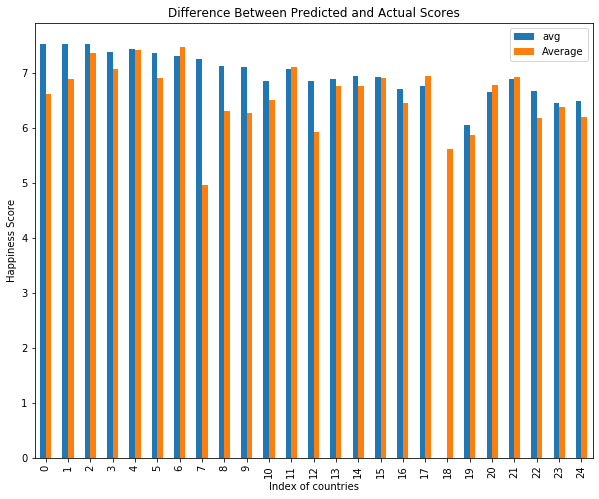

In [54]:
data2 = data2[:25]
arr = data2[['avg', 'Average']]
arr.plot(kind='bar',figsize=(10,8))
plt.xlabel('Index of countries')
plt.ylabel('Happiness Score')
plt.title('Difference Between Predicted and Actual Scores')